# **Initialization**

In [69]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1
!sudo apt-get install xvfb
!pip install swig
!pip install gym[box2d]

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.10).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [3]:
import gym
from gym import logger as gymlogger
from gym.wrappers.record_video import RecordVideo
from IPython.display import HTML
from IPython import display as ipythondisplay
import glob
import io
import base64
import pygame
import numpy as np
import random
from IPython.display import clear_output
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
import seaborn as sns
sns.set()
gymlogger.set_level(40) #error only
pygame.init()
pygame.font.init()

In [4]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else:
    print("Could not find video")

def wrap_env(env):
  env = RecordVideo(env, './video',  episode_trigger = lambda episode_number: True)
  return env

# **Test a random agent**

In [3]:
env = wrap_env(gym.make("Taxi-v3"))
observation = env.reset()
done = False
while not done:

    env.render()
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)

env.close()
show_video()

In [4]:
import gym

In [5]:
!pip show gym

Name: gym
Version: 0.25.2
Summary: Gym: A universal API for reinforcement learning environments
Home-page: https://www.gymlibrary.ml/
Author: Gym Community
Author-email: jkterry@umd.edu
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: cloudpickle, gym-notices, numpy
Required-by: dopamine-rl


In [ ]:
!pip install gym==0.25.2

In [6]:
env = gym.make('Taxi-v3')

In [18]:
env.reset()

221

array([[[110, 109, 106],
        [110, 109, 106],
        [124, 122, 122],
        ...,
        [108, 111, 109],
        [108, 111, 109],
        [118, 119, 119]],

       [[110, 109, 106],
        [110, 109, 106],
        [124, 122, 122],
        ...,
        [108, 111, 109],
        [108, 111, 109],
        [118, 119, 119]],

       [[114, 116, 115],
        [114, 116, 115],
        [126, 127, 126],
        ...,
        [112, 113, 111],
        [112, 113, 111],
        [118, 117, 115]],

       ...,

       [[116, 115, 116],
        [116, 115, 116],
        [106, 107, 108],
        ...,
        [113, 115, 114],
        [113, 115, 114],
        [117, 114, 117]],

       [[116, 115, 116],
        [116, 115, 116],
        [106, 107, 108],
        ...,
        [113, 115, 114],
        [113, 115, 114],
        [117, 114, 117]],

       [[115, 112, 112],
        [115, 112, 112],
        [119, 119, 117],
        ...,
        [123, 119, 118],
        [123, 119, 118],
        [114, 114, 117]]], dtype=uint8)
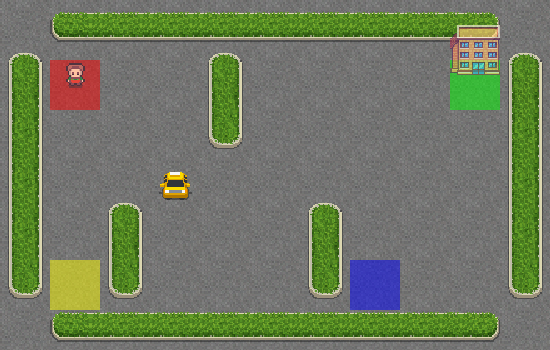

In [19]:
env.render(mode='rgb_array')

In [13]:
env.action_space.n

6

In [15]:
env.observation_space.n

500

In [24]:
env.action_space.sample()

5

array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
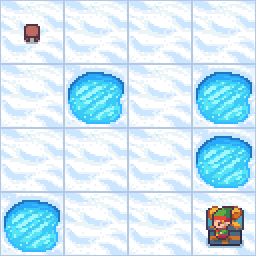

In [54]:
action = env.action_space.sample()
new_state, reward, done, info = env.step(action)
env.render(mode='rgb_array')

In [32]:
env = gym.make('FrozenLake-v1', is_slippery=False)

In [35]:
env.reset()

0

array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
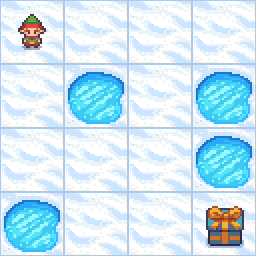

In [36]:
env.render(mode='rgb_array')

array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
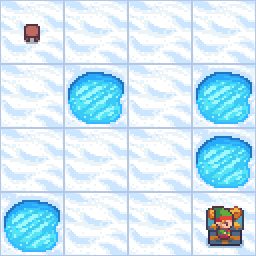

In [52]:
action = env.action_space.sample()
new_state, reward, done, info = env.step(2)
env.render(mode='rgb_array')

In [53]:
print(reward, done)

1.0 True


# **Train our model**

## Loading the gym environment

In [55]:
import gym

In [7]:
env = gym.make('Taxi-v3')

## Getting the state space

In [59]:
print('State Space: ', env.observation_space.n)
print('Action Space: ', env.action_space.n)

State Space:  500
Action Space:  6


## STEP 1 - Initializing the Q-table

In [60]:
np.zeros((4, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [8]:
Q = np.zeros((env.observation_space.n, env.action_space.n))

In [9]:
Q

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

## Setting the hyperparameters

In [10]:
alpha = 0.1
gamma = 0.99
epsilon = 1
max_eps = 1
min_eps = 0.01
decay = 0.01
train_episodes = 5000
max_step = 100

## Training the agent

In [64]:
a = [1, 2, 3]
print(a)

[1, 2, 3]


In [67]:
np.random.uniform(0, 1)

0.9308463122705835

In [70]:
a = [5, -1, 3, 0, -4, 6, 10, 8, 3]
np.argmax(a)


6

In [11]:
training_rewards = []
epsilons = []

for episode in range(train_episodes):
    state = env.reset()
    total_training_rewards = 0
    for step in range(max_step):

        # Choosing Action based on e-greedy policy
        if np.random.uniform(0, 1) > epsilon:
            action = np.argmax(Q[state,:])
        else:
            action = env.action_space.sample()

        # Excuting the action
        new_state, reward, done, info = env.step(action)

        # Updating Q-Table
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state, :]) - Q[state, action])

        # Adding reward
        total_training_rewards += reward

        state = new_state

        if done == True:
            break

    epsilon = min_eps + (max_eps - min_eps) * np.exp(-decay * episode)

    # Storing Total_reward and epsilon
    training_rewards.append(total_training_rewards)
    epsilons.append(epsilon)


## Visualizing total reward over all episodes

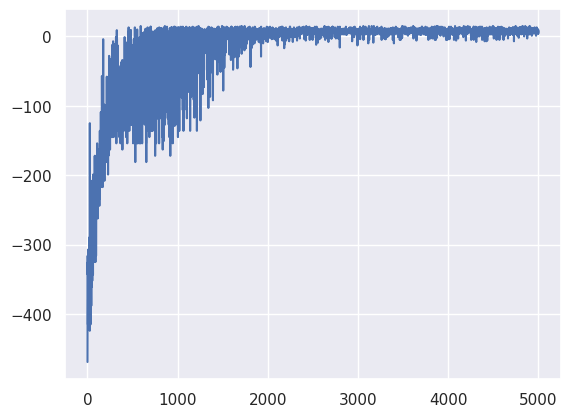

In [12]:
x = range(train_episodes)

plt.plot(x, training_rewards)
plt.show()

## Visualizing the epsilons over all episodes

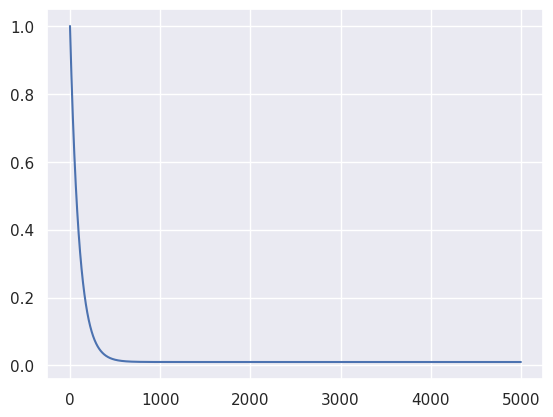

In [81]:
x = range(train_episodes)

plt.plot(x, epsilons)
plt.show()

# **Test Our Agent**

In [86]:
Q[246,:]

array([-5.85106866, -5.72593057,  5.30249185, -5.82236354, -6.29362019,
       -6.55133222])

In [16]:
env = wrap_env(gym.make("Taxi-v3"))
state = env.reset()
done = False
while not done:

    env.render()
    action = np.argmax(Q[state,:])
    state, reward, done, info = env.step(action)

env.close()
show_video()